[![enter image description here][1]][1]


  [1]: https://i.stack.imgur.com/ctU2A.png

#This page repo on github:

https://github.com/So-AI-love/academic-courses-Pattern-Recognition

Made based of [this post](https://medium.com/analytics-vidhya/gaussian-mixture-models-with-tensorflow-probability-125315891c22)




In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [17]:
!pip install drawnow

In [18]:
# import matplotlib.pyplot as plt
# from drawnow import drawnow
# import numpy as np

# def makeFig():
#     plt.scatter(xList,yList) # I think you meant this

# plt.ion() # enable interactivity
# fig=plt.figure() # make a figure

# xList=list()
# yList=list()

# for i in np.arange(50):
#     y=np.random.random()
#     xList.append(i)
#     yList.append(y)
#     drawnow(makeFig)
#     #makeFig()      The drawnow(makeFig) command can be replaced
#     #plt.draw()     with makeFig(); plt.draw()
#     plt.pause(0.001)

**Statistics**

The statistics required are: mean, covariance, diagonal, and standard deviation. We first generate X, a 2D array, then use the Numpy methods to compare statistics against the parameters used.

[![enter image description here][1]][1]


  [1]: https://i.stack.imgur.com/X17iT.png

https://colab.research.google.com/github/csmastersUH/data_analysis_with_python_2020/blob/master/bayes.ipynb#scrollTo=GtyyKfwkeG3c
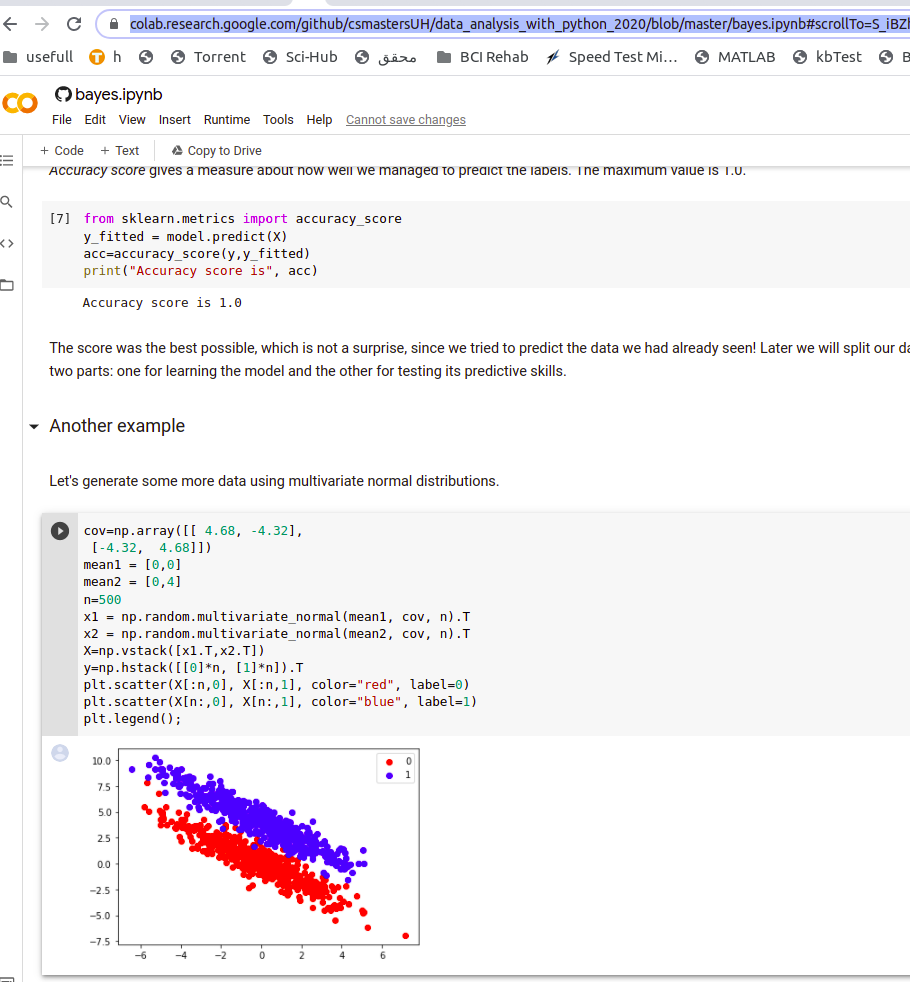![image.png](
)

*Classification* is one form of supervised learning. The aim is to annotate all data points with a label. Those points that have the same label belong to the same class. There can be two or more labels. For example, a lifeform can be classified (coarsely) with labels animal, plant, fungi, archaea, bacteria, protozoa, and chromista. The data points are observed to have certain features that can be used to predict their labels. For example, if it is has feathers, then it is most likely an animal.

In supervised learning an algorithm is first given a training set of data points with their features and labels. Then the algorithm learns from these features and labels a (probabilistic) model, which can afterwards be used to predict the labels of previously unseen data.

*Naive Bayes classification* is a fast and simple to understand classification method. Its speed is due to some simplifications we make about the underlying probability distributions, namely, the assumption about the independence of features. Yet, it can be quite powerful, especially when there are enough features in the data.

Suppose we have for each label L a probability distribution. This distribution gives probability for each possible combination of features (a feature vector):

$$P(features | L).$$

The main idea in Bayesian classification is to reverse the direction of dependence: we want to predict the label based on the features:

$$P(L | features)$$

This is possible by [the Bayes theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem):

$$P(L | features) = \frac{P(features | L)P(L)}{P(features)}.$$

Let's assume we have to labels L1 and L2, and their associated distributions: $P(features | L1)$ and $P(features | L2)$. If we have a data point with "features", whose label we don't know, we can try to predict it using the ratio of posterior probabilities:

$$\frac{P(L1 | features)}{P(L2 | features)} = \frac{P(features | L1)P(L1)}{P(features | L2)P(L2)}.$$

If the ratio is greater than one, we label our data point with label L1, and if not, we give it label L2.
The prior probabilities P(L1) and P(L2) of labels can be easily found out from the input data, as for each data point we also have its label. Same goes for the probabilities of features conditioned on the label.

We first demonstrate naive Bayes classification using Gaussian distributions.

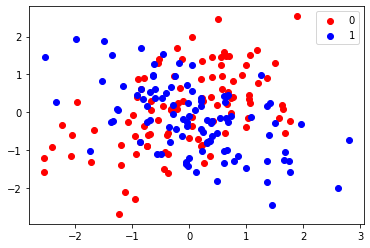

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(0)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
cov1 = np.array([[1,0.5],
       [0.5,1]]);
cov2 = np.array([[1, -0.5],
       [-0.5, 1]])
mean1 = [0,0]
mean2 = [0,0]
n=100
x1 = np.random.multivariate_normal(mean1, cov1, n).T
x2 = np.random.multivariate_normal(mean2, cov2, n).T
X=np.vstack([x1.T,x2.T])
y=np.hstack([[0]*n, [1]*n]).T
plt.scatter(X[:n,0], X[:n,1], color="red", label=0)
plt.scatter(X[n:,0], X[n:,1], color="blue", label=1)
plt.legend();

The two clusters seem to be quite separate. Let's try naive Bayesian classification on this data.

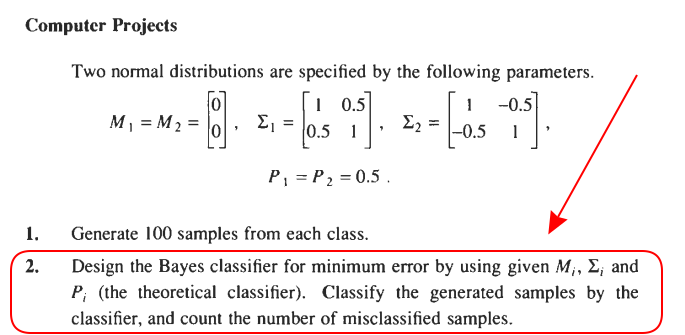

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

In [21]:
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

Means: [[-0.07055996  0.07221871]
 [ 0.06743416 -0.18038479]]
Standard deviations: [[1.01968708 1.0628503 ]
 [0.9769918  0.84116138]]


Accuracy score is 0.565

 Miss Clssified number is:87
 and are:[  3   4   6   7   8   9  11  13  15  16  17  19  20  22  26  27  28  29
  30  31  32  35  36  37  38  39  41  43  47  49  53  58  60  62  64  68
  69  71  76  77  78  81  83  84  85  86  88  89  90  91  92  96  97  98
 101 102 105 106 109 118 119 123 125 127 133 135 136 138 142 144 146 152
 154 163 165 166 170 174 176 180 181 186 188 194 195 198 199]


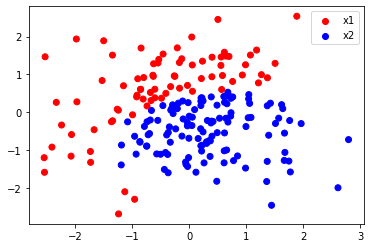

In [22]:
y_fitted = model.predict(X)
colors=np.array(["red", "blue"])
plt.scatter(X[:,0], X[:,1], color=colors[y_fitted])
plt.scatter([], [], color="red", label="x1")
plt.scatter([], [], color="blue", label="x2")
from sklearn.metrics import accuracy_score
acc=accuracy_score(y,y_fitted)
plt.legend()
print("Accuracy score is", acc)
import numpy as np

y1 = np.asarray(y_fitted)
misclassified = np.where(y != y1);misclassified=np.asarray(misclassified[0])
print('\n Miss Clssified number is:'+str(len(misclassified))+'\n and are:'+str(misclassified))

Even thought the score is quite good, we can see from the plot that the algorithm didn't have good models for the data. We can plot the models the algorithm used:

Let's plot these distributions. First we define a helper function to draw an ellipse that gives the standard deviation in each direction from the origo.

In [23]:
def plot_ellipse(ax, mu, sigma, color="k", label=None):
    """
    Based on
    http://stackoverflow.com/questions/17952171/not-sure-how-to-fit-data-with-a-gaussian-python.
    """
    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color, label=label)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    return ellipse

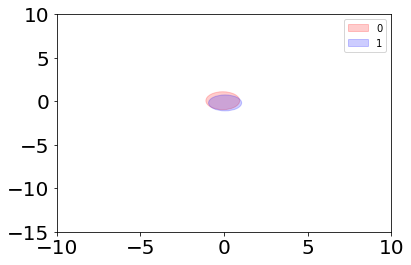

In [24]:
plt.figure()
plt.xlim(-10, 10)
plt.ylim(-15, 10)
e1=plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red", label="0")
e2=plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue", label="1")
plt.legend([e1, e2], ["0", "1"]);

The problem with naive Bayesian classification is that it tries to model the data using Gaussian distributions, which are aligned along the x and y axes. With this example data we would have needed Gaussian distributions which are "tilted".

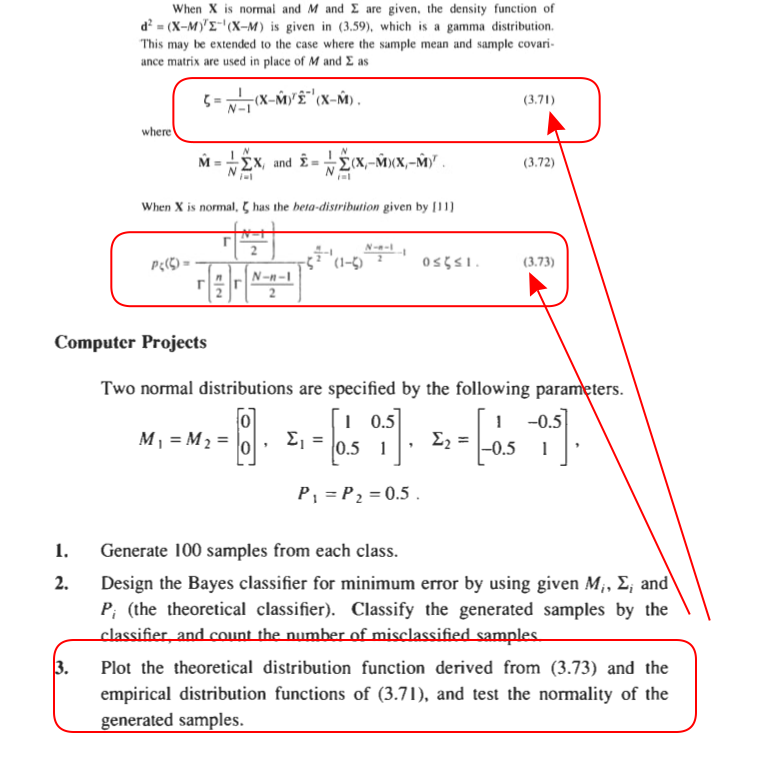

In [25]:
data = []

for i in range(n):
    data.append(...)

data = np.asarray(data)

In [26]:
for x in range(2):
  print(x)

0
1


In [27]:
X_Mu_matrix=[];
print(range(2))
for i in range(2):
  print(x1.shape)#-model.theta_[i]).shape)
  for j in range(len(x1[:,0])):
     nn=(x1[j,i]-model.theta_[i]);
     print(nn)
     X_Mu_matrix.append(nn);
X_Mu_matrix = np.asarray(X_Mu_matrix)
print(X_Mu_matrix.shape)

range(0, 2)
(2, 100)
[-1.65723279 -1.80001146]
[-1.25707558 -1.39985425]
(2, 100)
[-2.03549271 -1.78767377]
[0.20540049 0.45321943]
(4, 2)


In [28]:
print(x1.shape)
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_);#print(X.shape)#X_New=np.concatenate((x1, x2), axis=1) ;print(X_New.shape)
for i in range(2):
  print(x1.shape)#-model.theta_[i]).shape)
  for j in range(len(X[:,0])):
     sigma=(X[j,i]-model.theta_[i]).T*model.sigma[i,:]*(X[:,i]-model.theta_[i])
for i in range(2):
  print(x1.shape)#-model.theta_[i]).shape)
  for j in range(len(X[:,0])):
     nn=(X[j,i]-model.theta_[i]);
     X_Mu_matrix=X_Mu_matrix.append(nn);

x = np.concatenate((a, b))
k2, p = stats.normaltest(x)


(2, 100)
Means: [[-0.07055996  0.07221871]
 [ 0.06743416 -0.18038479]]
Standard deviations: [[1.01968708 1.0628503 ]
 [0.9769918  0.84116138]]
(2, 100)


AttributeError: ignored

In [ ]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# histogram plot
pyplot.hist(X);pyplot.show()

In [ ]:
#https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
stat, p = shapiro(X)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/

In [ ]:
# example of preparing and making a prediction with a naive bayes model
from sklearn.datasets import make_blobs
from scipy.stats import norm
from numpy import mean
from numpy import std

# fit a probability distribution to a univariate data sample
def fit_distribution(data):
	# estimate parameters
	mu = mean(data)
	sigma = std(data)
	print(mu, sigma)
	# fit distribution
	dist = norm(mu, sigma)
	return dist

# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
	return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

# generate 2d classification dataset
# sort data into classes
Xy0 = x1
Xy1 = x2
# calculate priors
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])
# classify one example
Xsample, ysample = X[0], y[0]
py0 = probability(Xsample, priory0, distX1y0, distX2y0)
py1 = probability(Xsample, priory1, distX1y1, distX2y1)
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))
print('Truth: y=%d' % ysample)

In [ ]:
# Importing library https://www.geeksforgeeks.org/ml-naive-bayes-scratch-implementation-using-python/
import math
import random
import csv


# the categorical class names are changed to numberic data
# eg: yes and no encoded to 1 and 0
def encode_class(mydata):
	classes = []
	for i in range(len(mydata)):
		if mydata[i][-1] not in classes:
			classes.append(mydata[i][-1])
	for i in range(len(classes)):
		for j in range(len(mydata)):
			if mydata[j][-1] == classes[i]:
				mydata[j][-1] = i
	return mydata			
			

# Splitting the data
def splitting(mydata, ratio):
	train_num = int(len(mydata) * ratio)
	train = []
	# initally testset will have all the dataset
	test = list(mydata)
	while len(train) < train_num:
		# index generated randomly from range 0
		# to length of testset
		index = random.randrange(len(test))
		# from testset, pop data rows and put it in train
		train.append(test.pop(index))
	return train, test


# Group the data rows under each class yes or
# no in dictionary eg: dict[yes] and dict[no]
def groupUnderClass(mydata):
	dict = {}
	for i in range(len(mydata)):
		if (mydata[i][-1] not in dict):
			dict[mydata[i][-1]] = []
		dict[mydata[i][-1]].append(mydata[i])
	return dict


# Calculating Mean
def mean(numbers):
	return sum(numbers) / float(len(numbers))

# Calculating Standard Deviation
def std_dev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
	return math.sqrt(variance)

def MeanAndStdDev(mydata):
	info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)]
	# eg: list = [ [a, b, c], [m, n, o], [x, y, z]]
	# here mean of 1st attribute =(a + m+x), mean of 2nd attribute = (b + n+y)/3
	# delete summaries of last class
	del info[-1]
	return info

# find Mean and Standard Deviation under each class
def MeanAndStdDevForClass(mydata):
	info = {}
	dict = groupUnderClass(mydata)
	for classValue, instances in dict.items():
		info[classValue] = MeanAndStdDev(instances)
	return info


# Calculate Gaussian Probability Density Function
def calculateGaussianProbability(x, mean, stdev):
	expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
	return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo


# Calculate Class Probabilities
def calculateClassProbabilities(info, test):
	probabilities = {}
	for classValue, classSummaries in info.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, std_dev = classSummaries[i]
			x = test[i]
			probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
	return probabilities


# Make prediction - highest probability is the prediction
def predict(info, test):
	probabilities = calculateClassProbabilities(info, test)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel


# returns predictions for a set of examples
def getPredictions(info, test):
	predictions = []
	for i in range(len(test)):
		result = predict(info, test[i])
		predictions.append(result)
	return predictions

# Accuracy score
def accuracy_rate(test, predictions):
	correct = 0
	for i in range(len(test)):
		if test[i][-1] == predictions[i]:
			correct += 1
	return (correct / float(len(test))) * 100.0


# driver code

# add the data path in your system
filename = r'E:\user\MACHINE LEARNING\machine learning algos\Naive bayes\filedata.csv'

# load the file and store it in mydata list
# mydata = csv.reader(open(filename, "rt"))
mydata=(x1,x2)
mydata = list(mydata)
mydata = encode_class(mydata)
for i in range(len(mydata)):
	mydata[i] = [float(x) for x in mydata[i]]

	
# split ratio = 0.7
# 70% of data is training data and 30% is test data used for testing
ratio = 0.7
train_data, test_data = splitting(mydata, ratio)
print('Total number of examples are: ', len(mydata))
print('Out of these, training examples are: ', len(train_data))
print("Test examples are: ", len(test_data))

# prepare model
info = MeanAndStdDevForClass(train_data)

# test model
predictions = getPredictions(info, test_data)
accuracy = accuracy_rate(test_data, predictions)
print("Accuracy of your model is: ", accuracy)


In [ ]:
# Group the data rows under each class yes or
# no in dictionary eg: dict[yes] and dict[no]
def groupUnderClass(mydata):
	dict = {}
	for i in range(len(mydata)):
		if (mydata[i][-1] not in dict):
			dict[mydata[i][-1]] = []
		dict[mydata[i][-1]].append(mydata[i])
	return dict


# Calculating Mean
def mean(numbers):
	return sum(numbers) / float(len(numbers))

# Calculating Standard Deviation
def std_dev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
	return math.sqrt(variance)

def MeanAndStdDev(mydata):
	info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)]
	# eg: list = [ [a, b, c], [m, n, o], [x, y, z]]
	# here mean of 1st attribute =(a + m+x), mean of 2nd attribute = (b + n+y)/3
	# delete summaries of last class
	del info[-1]
	return info

# find Mean and Standard Deviation under each class
def MeanAndStdDevForClass(mydata):
	info = {}
	dict = groupUnderClass(mydata)
	for classValue, instances in dict.items():
		info[classValue] = MeanAndStdDev(instances)
	return info


# Calculate Gaussian Probability Density Function
def calculateGaussianProbability(x, mean, stdev):
	expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
	return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo


# Calculate Class Probabilities
def calculateClassProbabilities(info, test):
	probabilities = {}
	for classValue, classSummaries in info.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, std_dev = classSummaries[i]
			x = test[i]
			probabilities[classValue] **= calculateGaussianProbability(x, mean, std_dev)
	return probabilities

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(0)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
cov1 = np.array([[1,0.5],
       [0.5,1]]);
cov2 = np.array([[1, -0.5],
       [-0.5, 1]])
mean1 = [0,0]
mean2 = [0,0]
n=100
x1 = np.random.multivariate_normal(mean1, cov1, n).T
x2 = np.random.multivariate_normal(mean2, cov2, n).T
X=np.vstack([x1.T,x2.T])
y=np.hstack([[0]*n, [1]*n]).T
plt.scatter(X[:n,0], X[:n,1], color="red", label=0)
plt.scatter(X[n:,0], X[n:,1], color="blue", label=1)
plt.legend();
print(x1[0,:])
calculateGaussianProbability(x1[0,:],mean(x1[0,:]),std_dev(x1[0,:]))



3. Compute[ the sample mean, M, and sample covariance matrix](hhttps://en.wikipedia.org/wiki/Sample_mean_and_covariance).

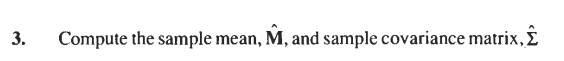

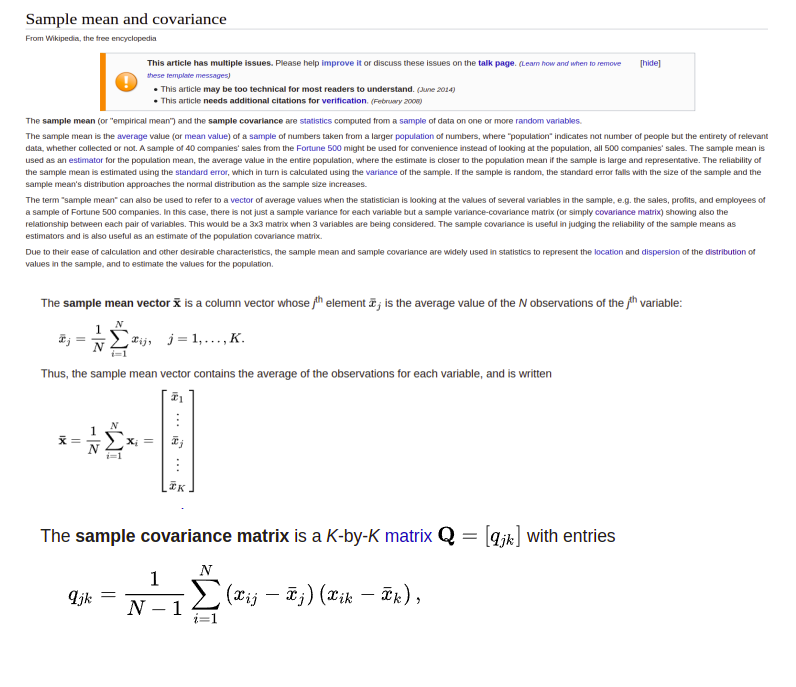

In [ ]:
np.random.seed(0)  # random seed
mu = [1,2]
cov = [[4,4],
       [4,9]]
X = np.random.multivariate_normal(mu, cov, size=100)
X_mean = np.mean(X, axis=0)
X_cov = np.cov(X, rowvar=0)
print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n'+str(mvn_mean))
print ('\n\n Sample Covariance of X is : \n'+str(mvn_cov))

**4.Repeat 1 and 3, 10 times. Compute the sample mean and sample variance
for each component of M and C over 10 trials.**

![enter image description here](https://i.stack.imgur.com/8zcbu.png)


In [ ]:
def do_it_loop(loop_1):
  np.random.seed(loop_1)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
  mu = [1,2]
  cov = [[4,4],
         [4,9]]
  X = np.random.multivariate_normal(mu, cov, size=100)
  X_mean = np.mean(X, axis=0)
  X_cov = np.cov(X, rowvar=0)
  X_diag = np.diag(X_cov)
  X_stddev = np.sqrt(X_diag)


  # Due to deprecated MultivariateNormalFullCovariance
  mvn = tfd.MultivariateNormalDiag(
  loc=X_mean,
  scale_diag=X_stddev)
  mvn_mean = mvn.mean().numpy()
  mvn_cov = mvn.covariance().numpy()
  mvn_stddev = mvn.stddev().numpy()

  print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n\n'+str(mvn_mean))
  print ('\n\n Sample Covariance of X is : \n\n'+str(mvn_cov))

  x1, x2 = np.meshgrid(X[:,0], X[:,1])
  data = np.stack((x1.flatten(), x2.flatten()), axis=1)
  prob = mvn.prob(data).numpy()
  ax = plt.axes(projection='3d')
  ax.plot_surface(x1, x2, prob.reshape(x1.shape), cmap='viridis')

  plt.show()

loop=10;
print(' Repeat '+str(loop)+'  times \n')
for i  in range(0,loop):
    # plt.subplots(1, loop_1)
  fig, axs = plt.subplots(loop,1)
  fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')

  do_it_loop(i)



**5. Repeat 4 for N =lo, 20, and 40, and examine the effect of the sample size.**

![enter image description here](https://i.stack.imgur.com/cZs2J.png)



In [ ]:
# matplotlib.rcParams.update({'font.serif': 'Times New Roman',
#                                 'font.size': 10.0,
#                                 'axes.labelsize': 'Medium',
#                                 'axes.labelweight': 'normal',
#                                 'axes.linewidth': 0.8,
#                                  ###########################################
#                                  # THIS IS THE IMPORTANT ONE FOR STRETCHING
#                                  # default is [6,4] but...i changed it to
#                                 'figure.figsize':[150,500]   # THIS ONE #
#                               })
    
def do_it_loop_2(loop_1,loop_N,axes,axes_col,axes_raw,fig):#,plt_my):
  mu = [1,2]
  cov = [[4,4],
         [4,9]]
  X = np.random.multivariate_normal(mu, cov, size=loop_N)
  X_mean = np.mean(X, axis=0)
  X_cov = np.cov(X, rowvar=0)
  X_diag = np.diag(X_cov)
  X_stddev = np.sqrt(X_diag)


  # Due to deprecated MultivariateNormalFullCovariance
  mvn = tfd.MultivariateNormalDiag(
  loc=X_mean,
  scale_diag=X_stddev)
  mvn_mean = mvn.mean().numpy()
  mvn_cov = mvn.covariance().numpy()
  mvn_stddev = mvn.stddev().numpy()

  # print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n\n'+str(mvn_mean))
  # print ('\n\n Sample Covariance of X is : \n\n'+str(mvn_cov))

  x1, x2 = np.meshgrid(X[:,0], X[:,1])
  data = np.stack((x1.flatten(), x2.flatten()), axis=1)
  prob = mvn.prob(data).numpy()
  ax = fig.add_subplot(axes_raw+1,axes_col+1,1, projection='3d')
  ax.plot_surface(x1, x2, prob.reshape(x1.shape), cmap='viridis')
  print (str(axes_raw)+','+str(axes_col))
  # axes[axes_raw,axes_col]=ax
  # plt.show()
  return axes

loop=10;
loop_N=[10]#[10,20,40]
np.random.seed(loop)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
fig = plt.figure(figsize=(100, 100))
axs = plt.subplots(5,2)#, sharex=True, sharey=True)
axs = plt.axes(projection='3d')

print(' Repeat '+str(loop)+'  times \n')
mm=1
for j in loop_N:
  for i  in range(0,5):
    for k in range(0,2):
      
      # plt.subplot(5, 2, mm);
      # if mm<=9 :
        # mm=mm+1;
      # fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')


      # plt.subplots(5, 2)
      # fig, axs = fig.subplot(i,1)
      # fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')
      axs_new=do_it_loop_2(i,j,axs,k,i,fig)
      
      # plt.show()
      # fig = plt.figure()
    
# plt.tight_layout()
plt.savefig("plot.png")
plt.show() 

# # fig, ax_array = plt.subplots(nrows=2, ncols=2)
# axs_new = axs_new.flatten()
# plt.subplots(5, 2)
# mm=1
# # (2) Plot loop
# for i, ax in enumerate(axs_new):
#   # ax.plot(x , np.sin(x + np.pi/2*i))
#   plt.subplot(5, 2, mm);
#   if mm<=9 :
#         mm=mm+1;
#   ax.set_title(f'plot {i}')

# plt.suptitle('Plots')
# axes[0].legend()
# axes[-1].set_xlabel('Sample Value', fontsize=13)
# plt.savefig('finalplot')
# plt.show()


    #  axes = fig.subplots(nrows=3, ncols=4)
    #  axs=do_it_loop_2(i,j)
    #  plt.show()



# # (1) Prepare the figure infrastructure 
# fig, ax_array = plt.subplots(nrows=2, ncols=2)
# ax_array = ax_array.flatten()

# # (2) Plot loop
# for i, ax in enumerate(ax_array):
#   ax.plot(x , np.sin(x + np.pi/2*i))
#   #ax.set_title(f'plot {i}')


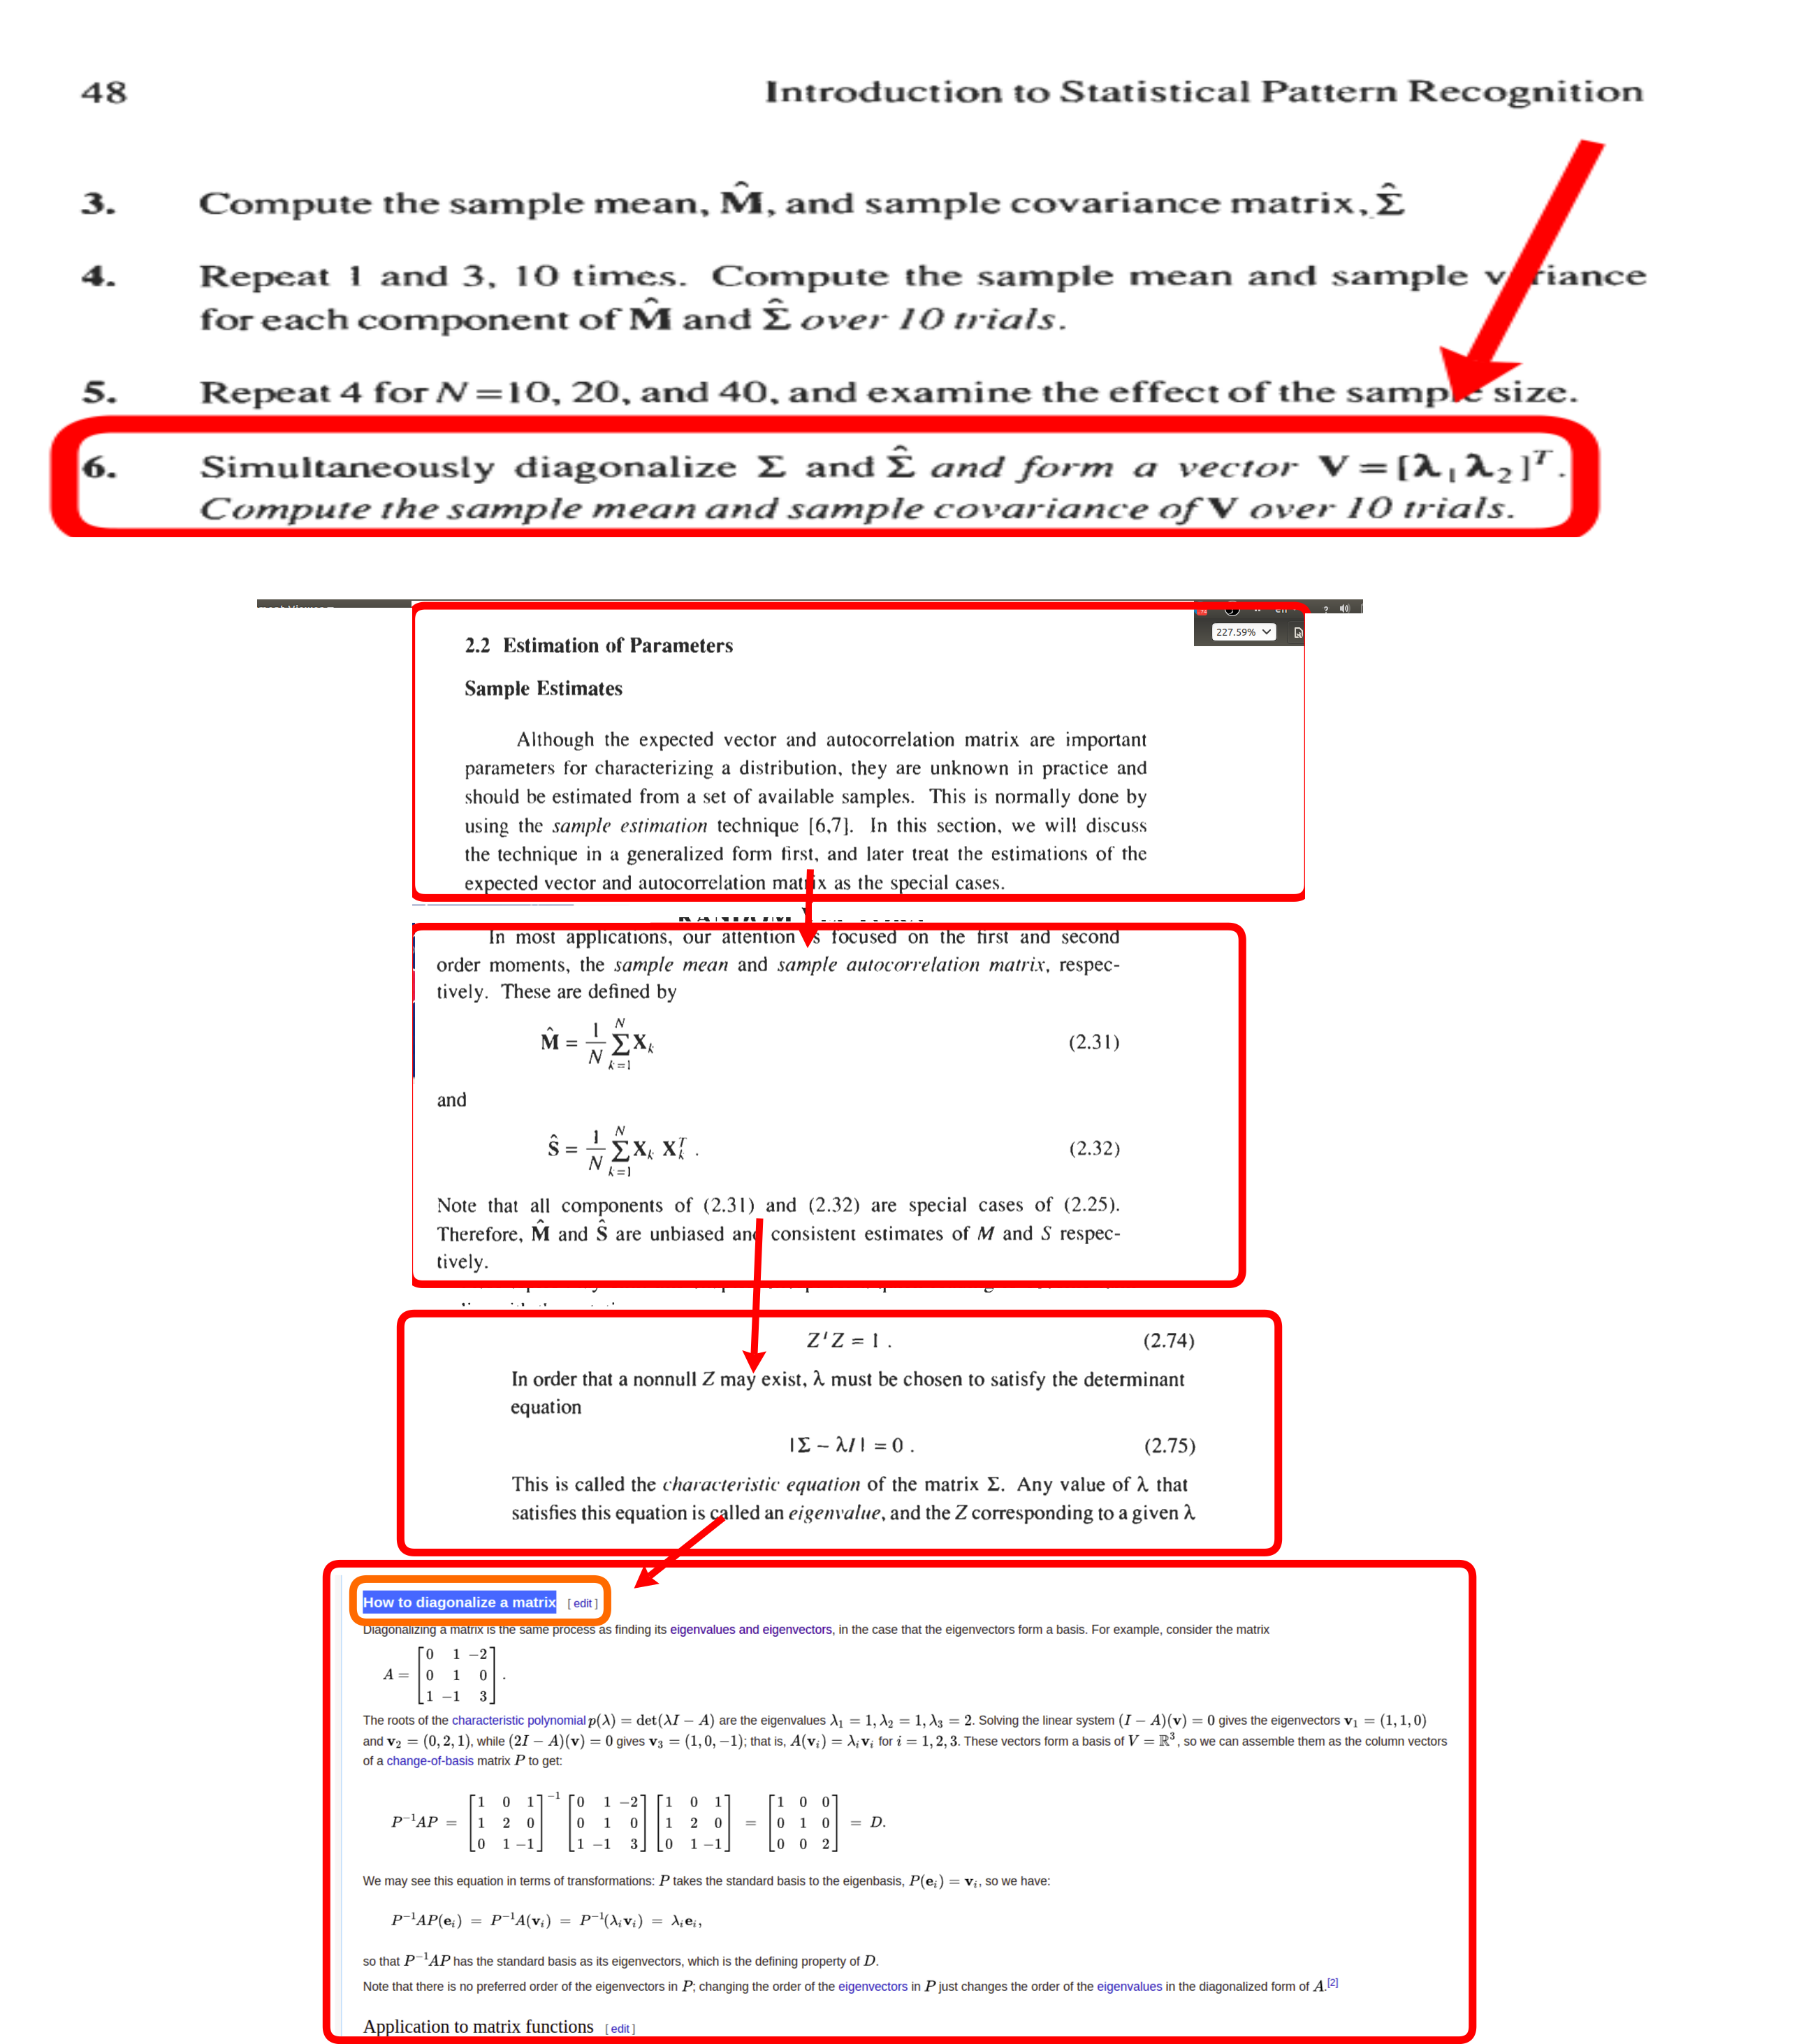

**Simultaneously diagonalize X and and form a vector V = [XI &I7
Compute the sample mean and sample covariance of V over I O trials**


![enter image description here](https://i.stack.imgur.com/PJOI4.png)



In [ ]:
cov = [[4,4],
         [4,9]]
mvn_cov_Diag=np.diag(np.diag(mvn_cov))
w,v =  np.linalg.eig(mvn_cov)
print( 'The Covariance Diagonal shape is: \n\n'+str(mvn_cov_Diag))

# print("Diagonal of Lambda: \n{}\n".format(diag_lambda))

# Find the eigendecomposition of matrix A
# decomp_A = tf.tensordot(tf.tensordot(eigen_vectors_A, diag_lambda, axes=1), tf.linalg.inv(new_eigen_vectors_A), axes=1)

# print("\n The decomposition Matrix A: \n{}".format(decomp_A))
print("\n The decomposition Matrix v: \n{}".format(v))
print("\n The decomposition Matrix W: \n{}".format(w))

In [ ]:
vv=mvn_cov_Diag[1:]
print(vv)

In [ ]:
# Compute covariance between vectors of matrix
def compute_Cov(A,B,n):
  C = np.zeros((n,n))
  for i in range(n):
    C[0:n,i]= np.mean(A[0:n,i]*B[0:n,i]) - np.mean(A[0:n,i])*np.mean(B[0:n,i])
    #C[0:n,i] = np.cov(A[0:n,i],B[0:n,i])
  return C
Cov_from_eyvector=compute_Cov(mvn_cov_Diag[1:],mvn_cov_Diag[2:],len(mvn_cov_Diag[[1:]]))

In [ ]:
def do_it_loop(loop_1,con_new,mu):
  np.random.seed(loop_1)  # random seed dont change  :https://stackoverflow.com/questions/3543833/how-do-i-clear-all-variables-in-the-middle-of-a-python-script
  # mu = [1,2]
  # cov = [[4,4],
  #        [4,9]]
  cov=np.diag(np.diag(con_new))

  X = np.random.multivariate_normal(mu, cov, size=100)
  X_mean = np.mean(X, axis=0)
  X_cov = np.cov(X, rowvar=0)
  X_diag = np.diag(X_cov)
  X_stddev = np.sqrt(X_diag)


  # Due to deprecated MultivariateNormalFullCovariance
  mvn = tfd.MultivariateNormalDiag(
  loc=X_mean,
  scale_diag=X_stddev)
  mvn_mean = mvn.mean().numpy()
  mvn_cov = mvn.covariance().numpy()
  mvn_stddev = mvn.stddev().numpy()

  print ('\n\n Sample mean of X which has been made by random.multivariate_normal function is : \n\n'+str(mvn_mean))
  print ('\n\n Sample Covariance of X is : \n\n'+str(mvn_cov))

  x1, x2 = np.meshgrid(X[:,0], X[:,1])
  data = np.stack((x1.flatten(), x2.flatten()), axis=1)
  prob = mvn.prob(data).numpy()
  ax = plt.axes(projection='3d')
  ax.plot_surface(x1, x2, prob.reshape(x1.shape), cmap='viridis')

  plt.show()
  return mvn_cov,mvn_mean

cov_m= [[4,4],
        [4,9]];
mu = [1,2];
loop=10;
print(' Repeat '+str(loop)+'  times \n')
for i  in range(0,loop):
    # plt.subplots(1, loop_1)
  fig, axs = plt.subplots(loop,1)
  fig.suptitle('Plot for iteration of  '+str(i)+ ' time is :')

  cov_new,mvn_mean=do_it_loop(i,cov_m,mu)
  cov_m=cov_new;mu=mvn_mean

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt


# imports specific to the plots in this example
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Twice as wide as it is tall.
fig = plt.figure(figsize=plt.figaspect(0.5))

#---- First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=10)

#---- Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

#The question asked:


1-[Can not fit the 3D subplot photo sizes (matplotlib)](https://stackoverflow.com/questions/67034366/can-not-fit-the-3d-subplot-photo-sizes-matplotlib):
![enter image description here](https://i.stack.imgur.com/6DtxW.png)
